# Importar Dataset

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

La documentacion para carga de Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [ ]:
boston = load_boston()
boston.keys()

a = boston['data']
b = boston['target']

In [ ]:
columnas = boston['feature_names']
columnas = np.append(columnas, 'MEDV')
columnas

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='<U7')

In [ ]:
a.shape

(506, 13)

In [ ]:
b.T.shape

(506,)

In [ ]:
c = np.column_stack((a,b))

In [ ]:
a[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [ ]:
b[0]

24.0

In [ ]:
c[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00, 2.400e+01])

In [ ]:
print('El dataset de Boston cuenta con {} filas y {} columnas'.format(c.shape[0], c.shape[1]))

El dataset de Boston cuenta con 506 filas y 14 columnas


In [ ]:
boston_df = pd.DataFrame(c, columns = columnas)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Analizamos el Dataset

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Inspeccion visual de los datos

Dentro de las alternativas para poder visualizar datos, nos encontramos con diferentes librerias tales como Matplotlib, Seaborn, Pandas, Bokeh, etc. 

A lo largo del curso vamos a utilizar Seaborn, ya que consideramos que posee un buen balance entre versalitidad, simplicidad y funciona muy bien con Pandas. Tambien importaremos Matplotlib, ya que seaborn esta construida sobre ella, y probablemente necesitemos utilizar algunas de las funciones.

In [ ]:
import matplotlib.pyplot as plt # 
import seaborn as sns # como importamos pandas as pd, numpy as np, searbon es comun importarla como sns.

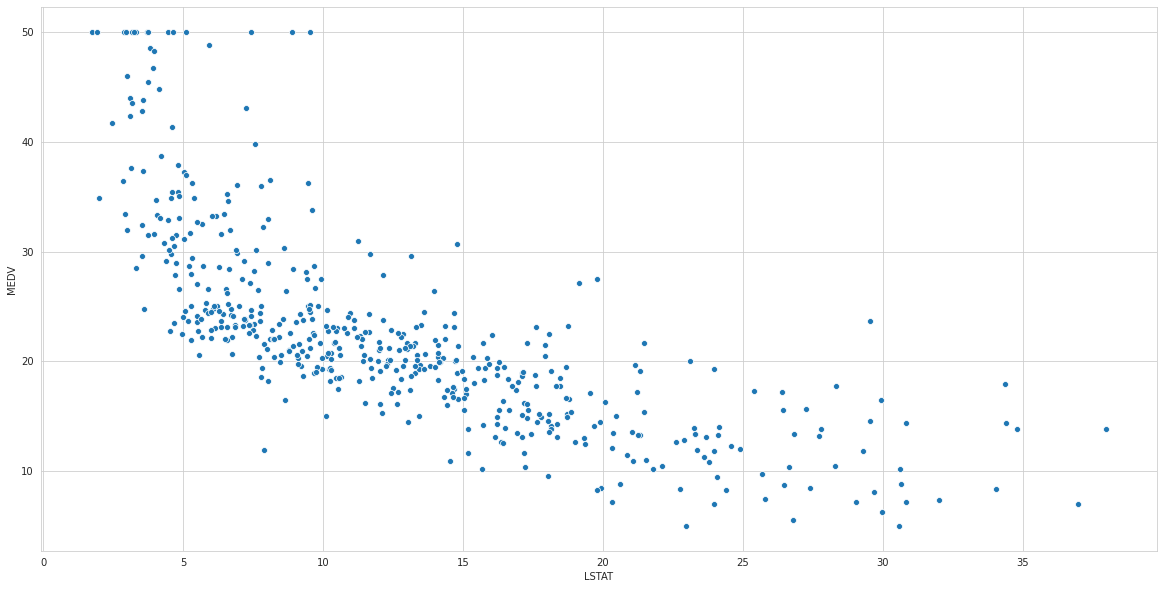

In [ ]:
sns.set_style("whitegrid") # para que los graficos posean un estilo particular utilizamos sns.set_style

fig, ax = plt.subplots(figsize = (20,10))


sns.scatterplot(x = 'LSTAT',
                y = 'MEDV',
                data = boston_df,
                ax = ax
                )

# Regresion lineal


Como vimos en el grafico anterior, hace sentido que haya una relacion entre LSTAT y MEDV, con lo cual podemos proceder a estimar una regresion lineal.

Para esto, necesitaremos importar una libreria de Statsmodels.

https://www.statsmodels.org/stable/regression.html


Es importante tener en consideracion los siguientes conceptos, vistos en la teoria:

- R2
- Residuos


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Ajustamos el modelo con una sóla lína de código, mediante la función "ols" del paquete "statmodels"
model = smf.ols("MEDV ~ LSTAT", data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        20:35:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [ ]:
# podemos acceder a los valores a traves de diferentes metodos

model.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [ ]:
model.rsquared

0.5441462975864799

Ya tenemos inicializada nuestra instacia de regresion lineal, y la hemos entrenado con los datos de LSTAT y MEDV, ahora deberiamos poder obtener los parametros para poder construir nuestra recta, recordemos que la funcion de la recta es:

      y = m * x + b


Donde b es la ordenada al origen y m la pendiente de la recta.

In [ ]:
m = model.params[1]

print('El valor de la pendiente de la recta es: {}'.format(m))

El valor de la pendiente de la recta es: -0.9500493537579922


In [ ]:
b = model.params[0]

print('El valor de la ordenada al origen de la recta es: {}'.format(b))

El valor de la ordenada al origen de la recta es: 34.55384087938308


In [ ]:
# ahora formulemos la recta
X = boston_df['LSTAT']
y = boston_df['MEDV']

y_pred = m * X + b
y_pred[:20]

0     29.822595
1     25.870390
2     30.725142
3     31.760696
4     29.490078
5     29.604084
6     22.744727
7     16.360396
8      6.118864
9     18.307997
10    15.125332
11    21.946686
12    19.628566
13    26.706433
14    24.806335
15    26.506923
16    28.302516
17    20.616617
18    23.447764
19    23.837284
Name: LSTAT, dtype: float64

In [ ]:
# tambien podemos utilizar una funcionalidad de la libreria llamada predict, esto nos simplifica el hecho de realizar la formula, verifiquemos si llegamos al mismo resultado

y_pred2 = model.predict(X)
y_pred2[:20]

0     29.822595
1     25.870390
2     30.725142
3     31.760696
4     29.490078
5     29.604084
6     22.744727
7     16.360396
8      6.118864
9     18.307997
10    15.125332
11    21.946686
12    19.628566
13    26.706433
14    24.806335
15    26.506923
16    28.302516
17    20.616617
18    23.447764
19    23.837284
dtype: float64

In [ ]:
# para obtener los residuos, simplemente restamos los valores de y reales, con los y predichos

residuos = y - y_pred

# para analizarlo estadisticamente lo convertiremos en una serie de pandas y luego utilizaremos el metodo "describe"
# tambien se pueden utilizar las funciones de Numpy para resumir estadisticamente al df, queda a criterio y facilidad de cada persona
residuos.describe()

count    5.060000e+02
mean     3.532001e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

In [ ]:
# SCT es las suma total de los cuadrados de la distancia entre el valor de las y de la muestra y su media muestral y_raya
# SCR es la suma total dela diferencia elevada al cuadrado de la distancia entre las y de la muestra y las y ajustadas por el modelo
y_pred = (m * X + b)
SCT = sum((y - np.mean(y)) ** 2)
SCR = sum((y - y_pred) ** 2)

r2 = 1 - (SCR/SCT)
print('El valor es de R cuadrado es {}'.format(r2))

El valor es de R cuadrado es 0.54414629758648


Ahora vamos a imprimir tanto los datos como la recta del modelo generado

Text(0.5, 1.0, 'Residuos')

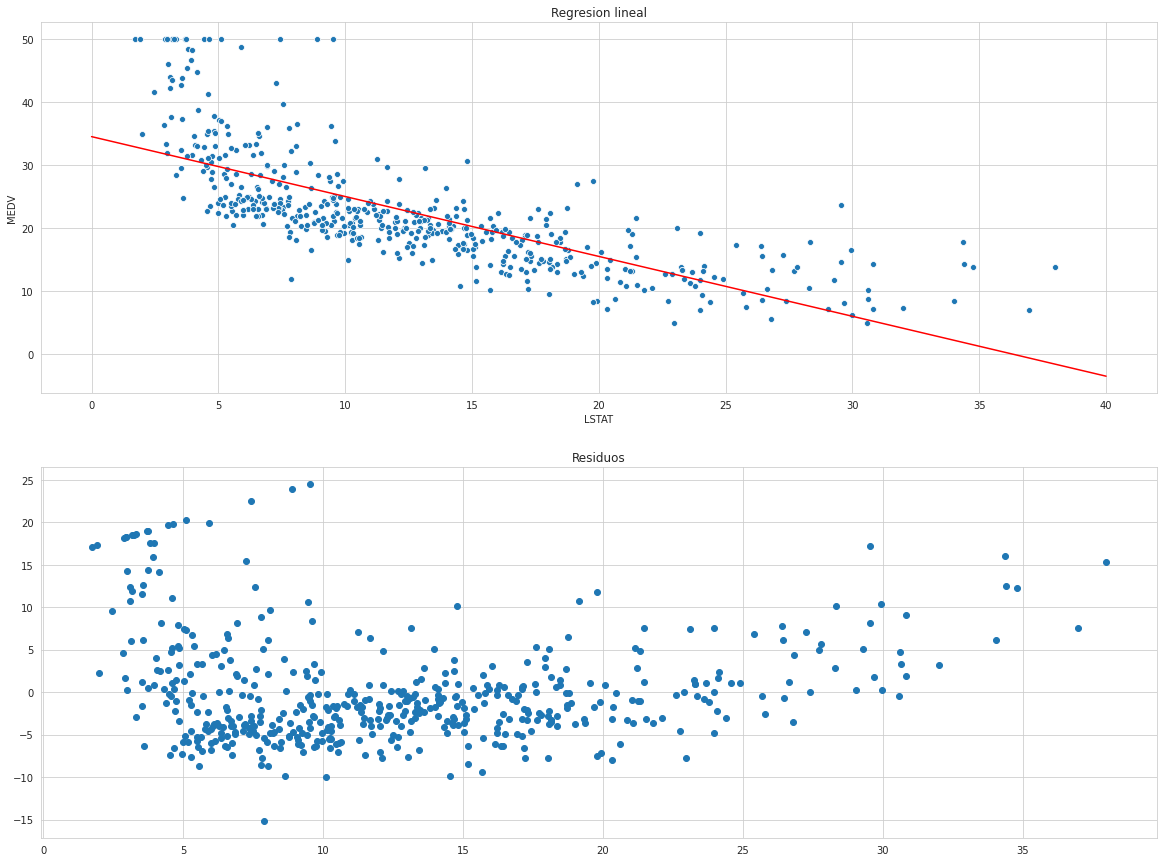

In [ ]:
x_recta = np.linspace(0, 40, 100)

y_recta = m * x_recta + b

fig, ax = plt.subplots(2, figsize = (20,15))

# en el primer grafico insertamos tanto la recta resultante del modelo de regresion lineal como los datos iniciales que utilizamos para 
ax[0].plot(x_recta, y_recta, c = 'r')
sns.scatterplot(x = 'LSTAT',
                y = 'MEDV',
                data = boston_df,
                ax = ax[0]
                )
ax[0].set_title('Regresion lineal')

# en el segundo grafico insertamos un scatterplot con los residuos
ax[1].scatter(X, residuos)
ax[1].set_title('Residuos')

Text(0.5, 1.0, 'Residuos')

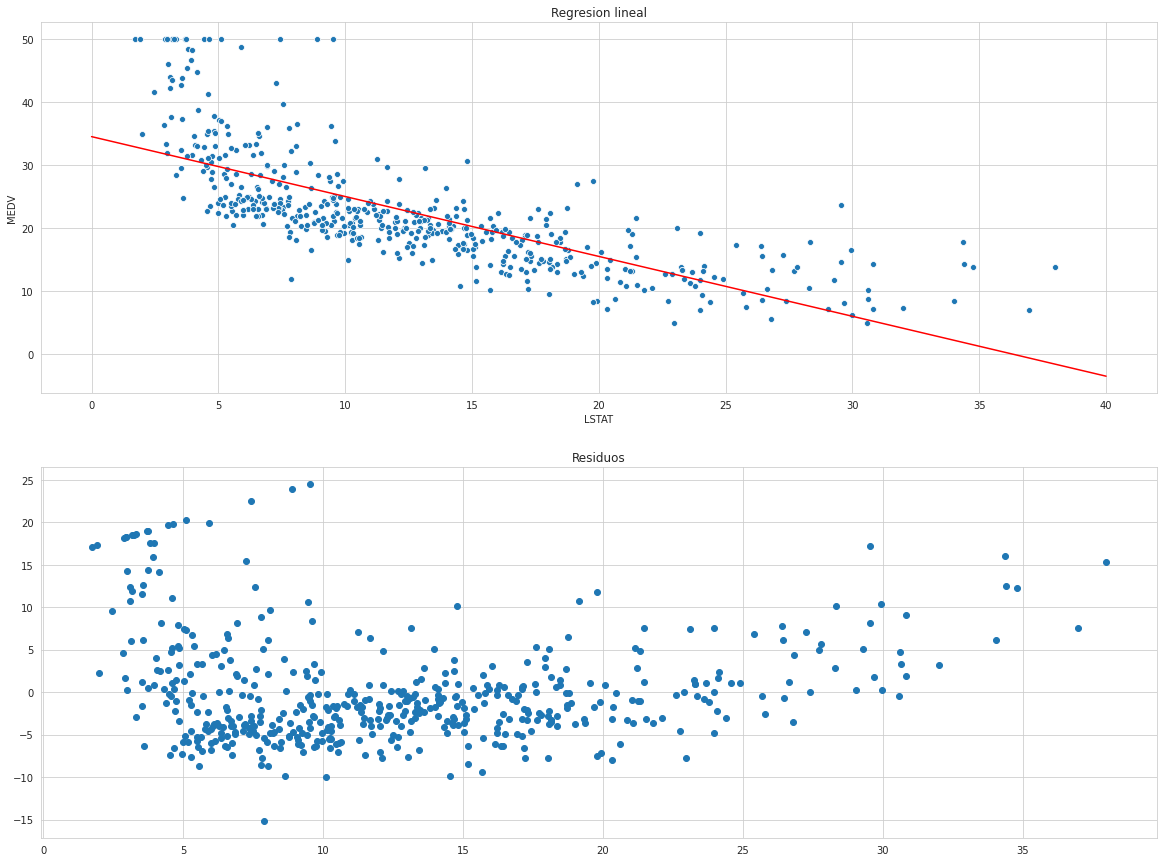

In [ ]:
# dato interesante para entender la funcion de plt.subplots(), la variable "ax", es una tupla del tamaño de el numero indicado. Dada esta propiedad podemos descomponerla la tupla en la misma formula 

fig, (ax0, ax1) = plt.subplots(2, figsize = (20,15))

# en el primer grafico insertamos tanto la recta resultante del modelo de regresion lineal como los datos iniciales que utilizamos para 
ax0.plot(x_recta, y_recta, c = 'r')
sns.scatterplot(x = 'LSTAT',
                y = 'MEDV',
                data = boston_df,
                ax = ax0
                )
ax0.set_title('Regresion lineal')

# en el segundo grafico insertamos un scatterplot con los residuos
ax1.scatter(X, residuos)
ax1.set_title('Residuos')

# Predecir un valor

Si queremos predecir un valor podemos ir nuevamente por dos caminos:

- Reemplazar los valores en la formula obtenida
- Utilizar el método **.predict()** sobre el modelo generado


Probemos predecir un valor, y luego, una serie de valores. Vamos a definir las variables en la siguiente linea de codigo.

Una vez terminado el ejercicio, verifiquemos si graficamente nos hace sentido el resultado.

In [ ]:
lstat_unica = pd.Series(np.array(5), name='LSTAT') # el reshape lo hacemos para que el formato del arreglo tenga formato definido

lstat_mult = pd.Series(np.array([5, 10, 20, 30]), name='LSTAT')

In [ ]:
# utilizamos el metodo para obtener el dato a traves de reemplazar los arreglos previos en la formula

lstat_pred_unica = m * lstat_unica + b

lstat_pred_mult = m * lstat_mult + b

In [ ]:
# verificamos la prediccion de un valor simple

lstat_pred_unica

0    29.8036
Name: LSTAT, dtype: object

In [ ]:
# verificamos la prediccion de un arreglo

lstat_pred_mult

0    29.803594
1    25.053347
2    15.552854
3     6.052360
Name: LSTAT, dtype: float64

# Conclusiones

Como vimos hoy hay muchas formas diferentes de como llegar al mismo resultado, dependiendo el tipo de problema siempre va a haber una alternativa mas simple para su resolucion.

Invitamos a revisar las librerias de sklearn y numpy, ya que van a ser muy necesarias para las siguientes practicas.